## Imports

In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'EDA_linear_regression.ipynb',
 'advertising.csv',
 'Simple+Linear+Regression+in+Python.ipynb']

## Read Data frame

In [4]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Check shape, info, describe, etc 

In [6]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Visualise data

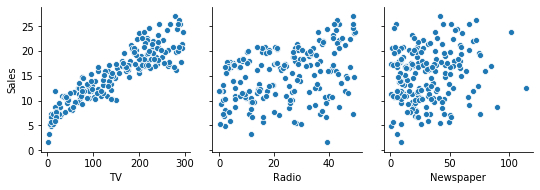

In [14]:
sns.pairplot(data=df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales')
plt.show()

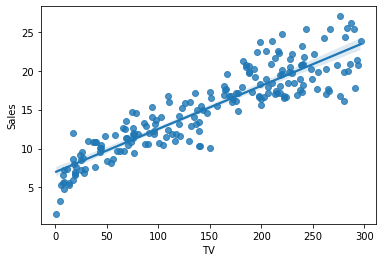

In [18]:
sns.regplot(data=df, x='TV', y='Sales')
plt.show()

### TV has good correlation with sales

## Heatmaps

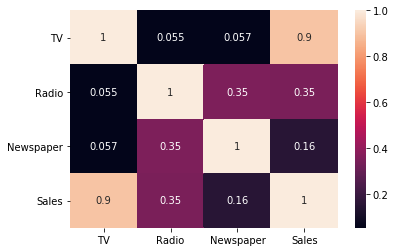

In [20]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### Thus TV has good correlation with sales. So lets do Linear Regression with TV variable

## Train and Test set

In [21]:
X = df.TV
y = df.Sales

### Train test split (70:30)

In [25]:
# create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [27]:
print(X.shape, X_train.shape)

(200,) (140,)


## To fit a model we need to make an adjustment to the feature for intercept to use statsmodel for model fitting

In [32]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [33]:
# fitting model with statsmodel Ordinary least Squares
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [34]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

# Sales = 6.94 + 0.05 * TV
# TV coefficient is positive
# When the expense in TV is zero 6.94 will be sales

In [37]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           1.52e-52
Time:                        15:54:38   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observe that P-value is very small especially wrt significance of 0.05 reject H0 
# i.e. the coefficients are statistically significant

## Visualise

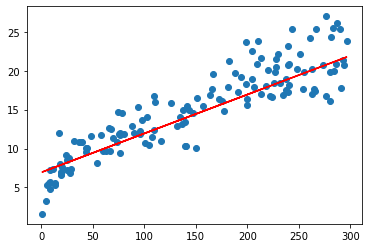

In [41]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.94 + 0.05*X_train, 'r')
plt.show()

## Residual Analysis

- we know that the residuals must have a close to normal distribution
- Residuals must be 

In [45]:
y_train_pred = lr_model.predict(X_train_sm)

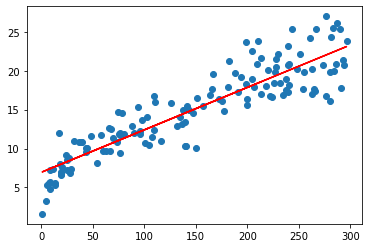

In [47]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

## Normal Histogram to quiclky verify the residuals

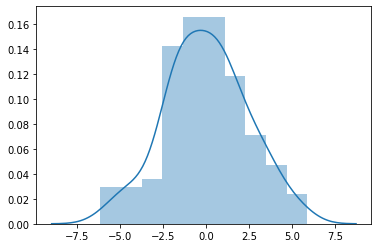

In [48]:
res = y_train-y_train_pred
sns.distplot(res)
plt.show()

Thus it is ok to use this for inference about the population 

In [51]:
res.shape

(140,)

## Residuals must be independent of X and there should be no patterns visible

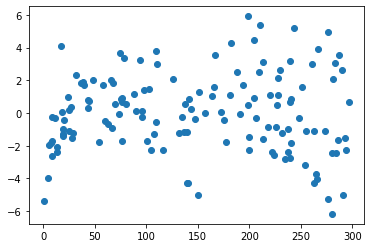

In [53]:
plt.scatter(X_train, res)
plt.show()

 The residuals are distributed on either side of zero line and there are no clusters or patterns

## Predictions

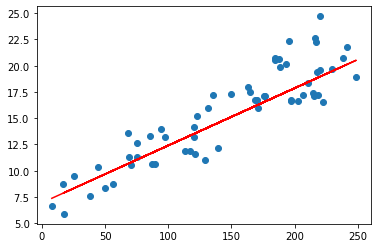

In [57]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

### Metrics

### RMSE for evaluating the test

In [59]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

2.019296008966233

## R-squared

In [61]:
r2_score(y_test, y_test_pred)

0.7921031601245658

In [62]:
r2_score(y_train, y_train_pred)

0.8157933136480389

# SkLearn Linear Regression

In [63]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.70, random_state=100)

In [65]:
from sklearn.linear_model import LinearRegression

In [69]:
train_X = train_X[:, np.newaxis]

In [81]:
test_X = test_X[:, np.newaxis]

In [71]:
train_y = train_y[:, np.newaxis]

In [73]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
print(lm.coef_, lm.intercept_)

[[0.05454575]] [6.9486832]


In [82]:
train_y_pred = lm.predict(train_X)
test_y_pred = lm.predict(test_X)

0.8157933136480389

In [84]:
r2_score(train_y, train_y_pred)
r2_score(test_y, test_y_pred)

0.7921031601245662